# AR time series modeling with air pollution dataset.

In [1]:
%matplotlib inline
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa import seasonal, stattools, ar_model, arima_model
from statsmodels.graphics import tsaplots
from sklearn.metrics import mean_squared_error
from datetime import datetime

C:\Users\michaelhsieh\AppData\Local\conda\conda\envs\DeepLearning\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Dataset available at https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [2]:
dataset=pd.read_csv('../Data/pollution.csv', parse_dates=True,
                    index_col=0)

In [3]:
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


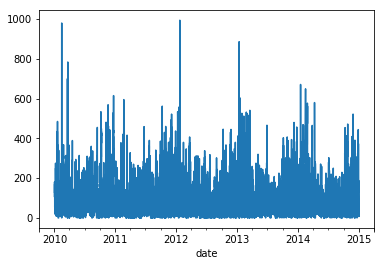

In [4]:
dataset['pollution'].plot()

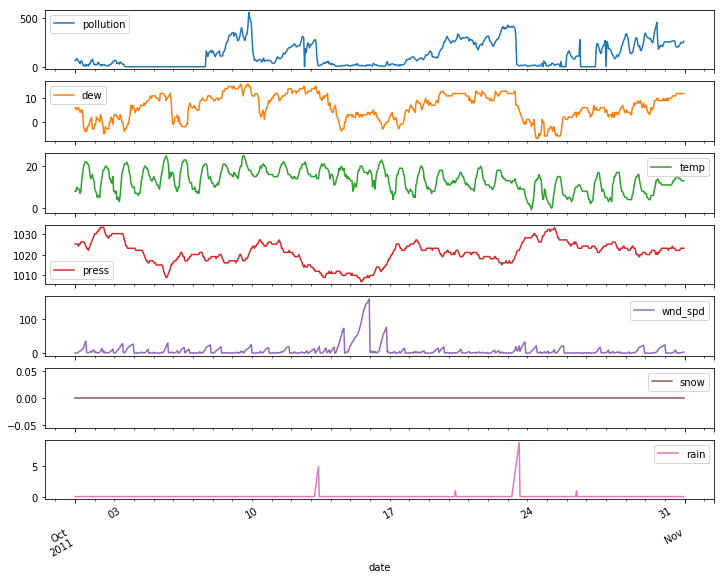

In [5]:
dataset['10/1/2011':'10/31/2011'].plot(subplots=True, figsize=(12,10))
plt.show()

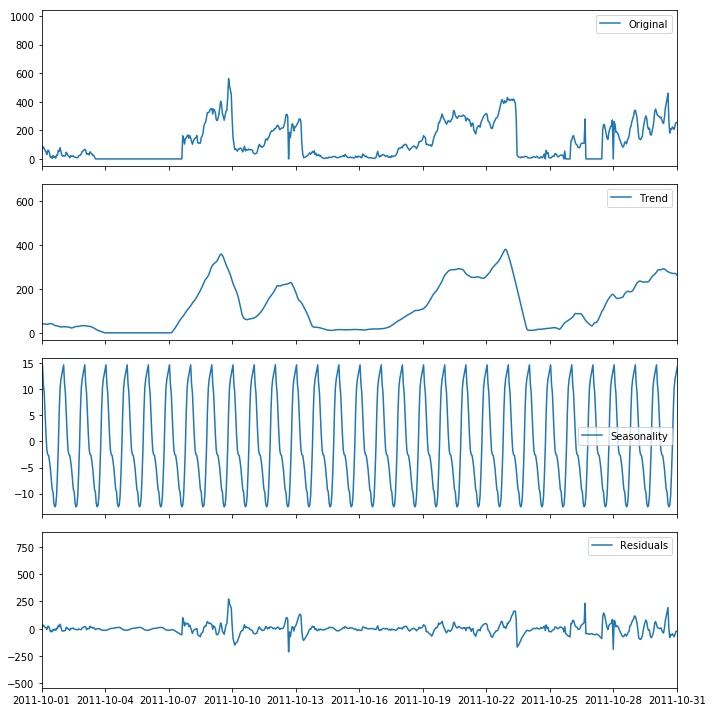

In [6]:
decomp=seasonal.seasonal_decompose(dataset.pollution)
trend = decomp.trend
season = decomp.seasonal
residual = decomp.resid

f, ax=plt.subplots(4,1, sharex=True, figsize=(10,10))
ax[0].plot(dataset.pollution, label='Original');ax[0].legend(loc='best')
ax[1].plot(trend, label='Trend');ax[1].legend(loc='best')
ax[2].plot(season,label='Seasonality');ax[2].legend(loc='best')
ax[3].plot(residual, label='Residuals');ax[3].legend(loc='best')
ax[0].set_xlim('10/1/2011','10/31/2011')
f.tight_layout()

In [7]:
dataset['pollution_1st_diff']=dataset.pollution-dataset.pollution.shift()
dataset['pollution_2nd_diff']=dataset['pollution_1st_diff']-dataset['pollution_1st_diff'].shift()

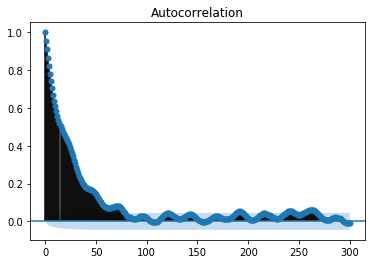

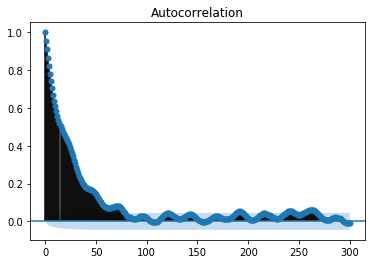

In [10]:
f, ax=plt.subplots(1,1)
tsaplots.plot_acf(dataset.pollution, lags=300, ax=ax)

In [14]:
acf_orig=stattools.acf(dataset['pollution'], nlags=200)
acf_resid=stattools.acf(residual.dropna(), nlags=200)
acf_1st=stattools.acf(dataset['pollution_1st_diff'].dropna(), nlags=200)
acf_2nd=stattools.acf(dataset['pollution_2nd_diff'].dropna(), nlags=200)

Text(0.5,1,'ACF: 2nd difference')

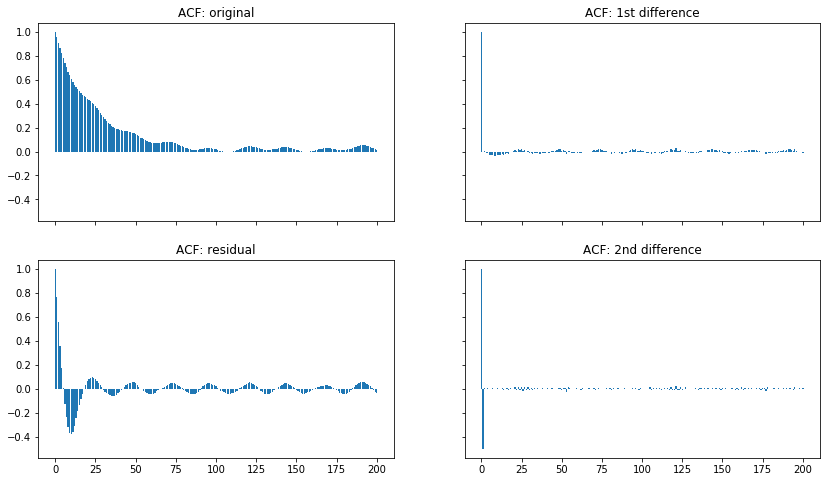

In [15]:
f, ax=plt.subplots(2,2, figsize=(14,8), sharex=True, sharey=True)

ax[0][0].bar(range(0, acf_orig.shape[0]), acf_orig)
ax[0][0].set_title('ACF: original')

ax[1][0].bar(range(0, acf_resid.shape[0]), acf_resid)
ax[1][0].set_title('ACF: residual')

ax[0][1].bar(range(0, acf_1st.shape[0]), acf_1st)
ax[0][1].set_title('ACF: 1st difference')

ax[1][1].bar(range(0, acf_2nd.shape[0]), acf_2nd)
ax[1][1].set_title('ACF: 2nd difference')

In [17]:
dataset.shape, dataset.index.max(), dataset.index.min()

((43800, 10),
 Timestamp('2014-12-31 23:00:00'),
 Timestamp('2010-01-02 00:00:00'))

In [19]:
train=dataset['2010':'2013']
test=dataset['2014':]
model=ar_model.AR(train['pollution'], 
                  dates=train.index)
result=model.fit()

In [22]:
train.shape, test.shape, dataset.shape

((35040, 10), (8760, 10), (43800, 10))

In [29]:
predicted=result.predict(start=35040, end=43799)

In [30]:
predicted.shape

(8760,)

In [32]:
rmse = np.sqrt(mean_squared_error(test.pollution, predicted))
print(rmse)

93.63532154426242


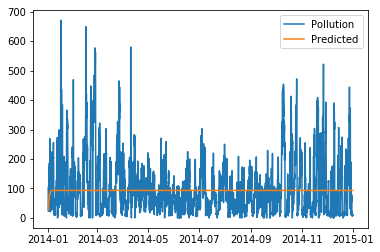

In [33]:
plt.plot(test.pollution,
         label='Pollution')
plt.plot(predicted, label='Predicted')
plt.legend()

use sklearn.model_selection.TimeSeriesSplit